In [211]:
## Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [212]:
## Loading the dataset
data = pd.read_csv("ratings_Electronics.csv")

In [213]:
## Reading the data
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [214]:
## Renaming the columns name as given in description
data.columns = ['userId', 'productId', 'ratings', 'timestamp']
## Deleting the timestamp column as it it not needed for this requirement
data = data.drop('timestamp', axis = 1)

In [215]:
## After renaming the columns and drop the timestamp columns.. data looks like ....
data.head()

,userId,productId,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [216]:
# checking shape of data 
data.shape

(7824481, 3)

In [217]:
## checking if there is any null value present
print("There are no null value")
print("")
data.isnull().sum()

There are no null value



userId       0
productId    0
ratings      0
dtype: int64

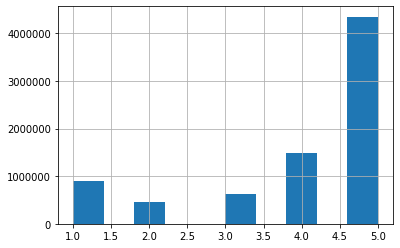

In [218]:
#histogram
data["ratings"].hist()

In [219]:
## Make subset of data .. consider only user who has given more than 50 ratings
counts = data['userId'].value_counts()
subset_data = data[data['userId'].isin(counts[counts >= 50].index)]

In [220]:
## Shape of new data
subset_data.shape

(125871, 3)

#### Building Popular Based Recommendation System

In [221]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productId')['ratings'].mean()) 
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productId')['ratings'].count())
ratings_mean_count.head() 

,ratings,rating_counts
productId,,
0594451647,5.00,1
0594481813,3.00,1
0970407998,1.00,1
0972683275,4.75,4
1400501466,3.00,5


##### ~> Note : As we can see , there is no userId parameter required for popular based recomendation system.
##### Thus, above result will be same for all users as popular recommendation system is non personalized recommendation system

## Build Collaborative Filtering model. (SVD)

In [222]:
svdData = pd.concat([train_data, test_data]).reset_index()
SVD_data = svdData.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
SVD_data['user_index'] = np.arange(0, pivot_df.shape[0], 1)
SVD_data.set_index(['user_index'], inplace=True)

In [223]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(SVD_data, k =24)
sigma = np.diag(sigma)

In [224]:
X_pred = np.dot(np.dot(U, sigma), Vt) 
# print('User-based CF MSE: ' + str(rmse(X_pred, test_data)))
prediction_data = pd.DataFrame(X_pred, columns = SVD_data.columns)

In [225]:
def showResultSVD(userId, SVD_data, prediction_data, k):
    rating_value = SVD_data.iloc[userId].sort_values(ascending=False)
    prediction_value = prediction_data.iloc[userId].sort_values(ascending=False)
    result = pd.concat([rating_value, prediction_value], axis=1)
    result.columns = ['Rating', 'Prediction']    
    print(result.head(k))

In [226]:
showResultSVD(143, SVD_data, prediction_data, 5)

            Rating  Prediction
B008GGH4OK     5.0    0.004064
B00BLS3YYO     5.0    0.004064
B002GWO8OY     5.0    0.004064
B001QUA6R0     5.0    0.055761
B005HMKKH4     5.0    0.298422


In [227]:
showResultSVD(176, SVD_data, prediction_data, 5)

            Rating  Prediction
B001HBHLEY     5.0    0.043743
B00095W91O     5.0    0.070784
B00AZCGF7K     5.0    0.057367
B000JV9LUK     5.0    0.299818
B000AYKUUQ     5.0    0.081169


#### SVD is personalized recommendation system as we can see for above 2 users .. results are also different ..
#### However in popular based recomendation system .. results will always be same for all users.
#### We have to use different type of recommendation system according to requirement or need to combine more than one recomendation system to achive the goal.